### IMPORT LIBERARY

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt*

### READING CSV FILE

In [48]:
df = pd.read_csv('car.csv')

### GET DATA NOT ZERO IN PRICE COLUMN

In [49]:
data_clean = df[df['Price']>1]
data_clean

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [50]:
log_price = np.log(data_clean['Price'])
log_price

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
4340    11.736069
4341     8.779557
4342     8.987197
4343     9.560997
4344     9.510445
Name: Price, Length: 4173, dtype: float64

### ADD NEW COLUMN TO DATA WITH NAME log_price

In [51]:
data_clean['log_price'] = log_price

/tmp/ipykernel_3289/1789912497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['log_price'] = log_price


### show head ten item in data

In [52]:
data_clean.head(10)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63,12.206068
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320,8.716044
7,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
8,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209
9,Volkswagen,1400.0,other,212,1.8,Gas,no,1999,Golf IV,7.244228


### PAIN DATA IN VECTOR

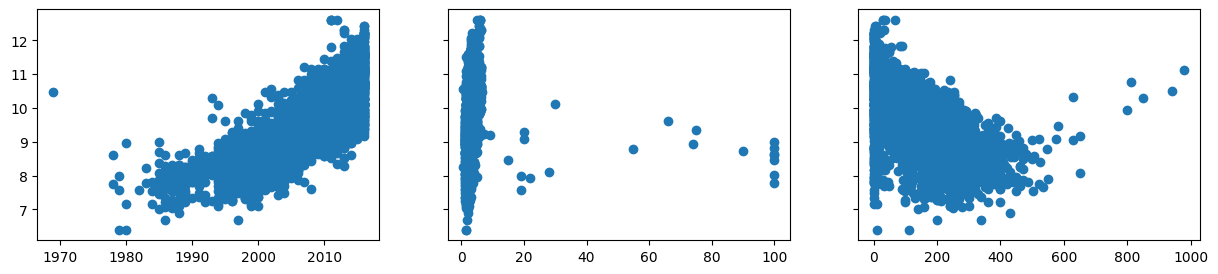

In [53]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_clean['Year'], data_clean['log_price'])
ax2.scatter(data_clean['EngineV'], data_clean['log_price'])
ax3.scatter(data_clean['Mileage'], data_clean['log_price'])



### REMOVE COLUMN PRICE

In [54]:
data_clean = data_clean.drop('Price', axis=1)

### SHOW COLUMNS

In [55]:
data_clean.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

### CREATE DATAFRAME 

In [62]:
variable = data_clean[['Mileage','Year','EngineV']]
vdf = pd.DataFrame()
variable.values

#vdf['VIF'] = [variance_inflation_factor(variable.values, i) for i in range(variable.shape[1])]

array([[2.770e+02, 1.991e+03, 2.000e+00],
       [4.270e+02, 1.999e+03, 2.900e+00],
       [3.580e+02, 2.003e+03, 5.000e+00],
       ...,
       [1.940e+02, 1.985e+03, 2.000e+00],
       [3.100e+01, 2.014e+03,       nan],
       [1.240e+02, 2.013e+03, 2.000e+00]])